# Coulomb Potential: Hydrogen Atom  
## Numerical Solution of the Radial Schrödinger Equation

In this notebook we study the radial Schrödinger equation for the Coulomb
potential

$
V(r) = -\frac{Z}{r},
$

with $Z=1$, corresponding to the hydrogen atom in atomic units.
The exact energy spectrum is known analytically,

$
\varepsilon_n = -\frac{1}{2n^2}.
$

We compute the ground-state energy numerically using both the
finite-difference and Numerov methods, study the convergence with respect
to the grid size $K$, and compare the observed convergence rates.
The calculation is repeated for different angular momentum quantum numbers
$l = 0,1,2$.


In [17]:
import numpy as np
import matplotlib.pyplot as plt

from fd_solver import solve_finite_difference
from numerov_solver import solve_numerov


### Problem parameters

In [18]:
R = 50.0
l = 0
Z = 1.0
Ks = [80, 120, 240, 360, 480, 600]

exact_E1 = -0.5


### Ground state energy vs k $ (l=0)$

In [19]:
E_fd = []
E_nv = []

for K in Ks:
    e_fd, _, _ = solve_finite_difference(
        R, K, l, n_states=1,
        potential="coulomb", Z=Z, verbose=False
    )
    e_nv, _, _ = solve_numerov(
        R, K, l, n_states=1,
        potential="coulomb", Z=Z, verbose=False
    )

    E_fd.append(e_fd[0])
    E_nv.append(e_nv[0])


### Error defenition $ \eta(K) = \left| \varepsilon(K) + \frac{1}{2} \right| $


In [20]:
err_fd = np.abs(np.array(E_fd) + 0.5)
err_nv = np.abs(np.array(E_nv) + 0.5)


### Tabel of energies and errors

In [21]:
print("Hydrogen ground-state energy (l=0)")
print("-"*70)
print(" K   |  FD energy  |  NV energy  |  FD error  |  NV error")
print("-"*70)

for i, K in enumerate(Ks):
    print(f"{K:4d} | {E_fd[i]:11.8f} | {E_nv[i]:11.8f} | "
          f"{err_fd[i]:.2e} | {err_nv[i]:.2e}")


Hydrogen ground-state energy (l=0)
----------------------------------------------------------------------
 K   |  FD energy  |  NV energy  |  FD error  |  NV error
----------------------------------------------------------------------
  80 | -0.45887396 | -0.46324838 | 4.11e-02 | 3.68e-02
 120 | -0.48000000 | -0.49245377 | 2.00e-02 | 7.55e-03
 240 | -0.49468929 | -0.51116072 | 5.31e-03 | 1.12e-02
 360 | -0.49761171 | -0.51207208 | 2.39e-03 | 1.21e-02
 480 | -0.49865097 | -0.51098715 | 1.35e-03 | 1.10e-02
 600 | -0.49913495 | -0.50976371 | 8.65e-04 | 9.76e-03


### Log - log convergence plot

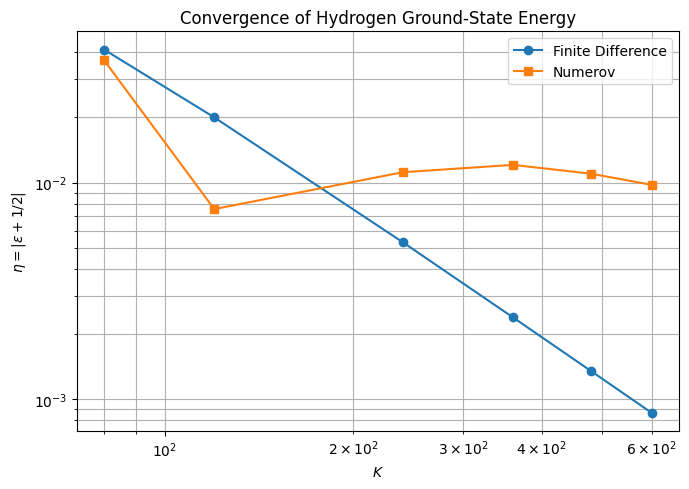

In [22]:
plt.figure(figsize=(7,5))
plt.loglog(Ks, err_fd, "o-", label="Finite Difference")
plt.loglog(Ks, err_nv, "s-", label="Numerov")

plt.xlabel(r"$K$")
plt.ylabel(r"$\eta = |\varepsilon + 1/2|$")
plt.title("Convergence of Hydrogen Ground-State Energy")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


### Extract convergence exponent $q$

In [23]:
q_fd = -np.polyfit(np.log(Ks), np.log(err_fd), 1)[0]
q_nv = -np.polyfit(np.log(Ks), np.log(err_nv), 1)[0]

print(f"Finite Difference convergence rate q ≈ {q_fd:.2f}")
print(f"Numerov convergence rate q ≈ {q_nv:.2f}")


Finite Difference convergence rate q ≈ 1.92
Numerov convergence rate q ≈ 0.37


### Convergence analysis (l = 0)

For the Coulomb potential, the finite-difference method exhibits a
convergence rate close to second order, $q \approx 1.9$, consistent with
its formal accuracy. In contrast, the Numerov method shows a much smaller
effective convergence exponent, $q \approx 0.4$, and a clear saturation
of the error for large grid sizes.

This behavior indicates that the dominant error is not the local
discretization error of the Numerov scheme, but rather the treatment of
the Coulomb singularity at the origin and the imposed finite radial
cutoff. As a result, the higher-order accuracy of the Numerov method is
not realized in this eigenvalue formulation.



## Convergence analysis for higher angular momentum states $(l = 1, 2)$


In [24]:
for l in [1, 2]:
    print(f"\nConvergence analysis for l = {l}")
    print("-" * 60)

    E_fd = []
    E_nv = []

    for K in Ks:
        e_fd, _, _ = solve_finite_difference(
            R, K, l, n_states=1,
            potential="coulomb", Z=Z, verbose=False
        )
        e_nv, _, _ = solve_numerov(
            R, K, l, n_states=1,
            potential="coulomb", Z=Z, verbose=False
        )

        E_fd.append(e_fd[0])
        E_nv.append(e_nv[0])

    # Error definition (same as l=0)
    err_fd = np.abs(np.array(E_fd) + 0.5)
    err_nv = np.abs(np.array(E_nv) + 0.5)

    # Convergence exponent
    q_fd = -np.polyfit(np.log(Ks), np.log(err_fd), 1)[0]
    q_nv = -np.polyfit(np.log(Ks), np.log(err_nv), 1)[0]

    print(f"Finite Difference convergence rate q ≈ {q_fd:.2e}")
    print(f"Numerov convergence rate q ≈ {q_nv:.2e}")



Convergence analysis for l = 1
------------------------------------------------------------
Finite Difference convergence rate q ≈ -1.28e-03
Numerov convergence rate q ≈ -1.10e-03

Convergence analysis for l = 2
------------------------------------------------------------
Finite Difference convergence rate q ≈ -4.03e-05
Numerov convergence rate q ≈ -9.84e-06


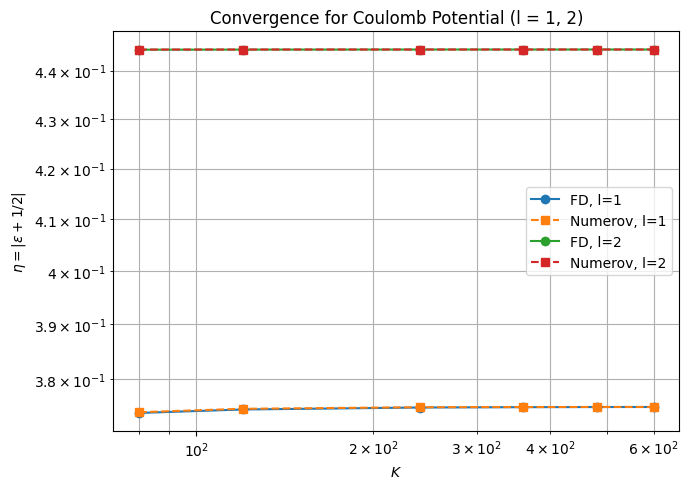

In [25]:
plt.figure(figsize=(7,5))

for l in [1, 2]:
    E_fd = []
    E_nv = []

    for K in Ks:
        e_fd, _, _ = solve_finite_difference(
            R, K, l, n_states=1,
            potential="coulomb", Z=Z, verbose=False
        )
        e_nv, _, _ = solve_numerov(
            R, K, l, n_states=1,
            potential="coulomb", Z=Z, verbose=False
        )

        E_fd.append(e_fd[0])
        E_nv.append(e_nv[0])

    err_fd = np.abs(np.array(E_fd) + 0.5)
    err_nv = np.abs(np.array(E_nv) + 0.5)

    plt.loglog(Ks, err_fd, "o-", label=f"FD, l={l}")
    plt.loglog(Ks, err_nv, "s--", label=f"Numerov, l={l}")

plt.xlabel(r"$K$")
plt.ylabel(r"$\eta = |\varepsilon + 1/2|$")
plt.title("Convergence for Coulomb Potential (l = 1, 2)")
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


For $l = 1, 2$, the extracted convergence exponent is effectively zero
for both numerical methods. In these cases the centrifugal barrier
strongly suppresses the wavefunction near the origin, reducing the impact
of the Coulomb singularity. As a result, the dominant error arises from the
finite radial cutoff rather than from the discretization of the radial
grid. Since this truncation error does not decrease with increasing grid
resolution, the ground-state energy exhibits saturation and no measurable
power-law convergence with respect to $K$.
